In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

df=pd.read_csv('Data/fd-export.csv')
df = df.dropna()
df['checkin_date'] = pd.to_datetime(df['checkin_date'])
df.info()

C:\Users\bchou\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 869894 entries, 1 to 1048574
Data columns (total 9 columns):
user_id            869894 non-null object
age                869894 non-null float64
sex                869894 non-null object
country            869894 non-null object
checkin_date       869894 non-null datetime64[ns]
trackable_id       869894 non-null object
trackable_type     869894 non-null object
trackable_name     869894 non-null object
trackable_value    869894 non-null object
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 66.4+ MB


In [2]:
len(df)

869894

### Data Cleaning

In [3]:
df["trackable_name"] = df["trackable_name"].str.lower()

In [4]:
df["trackable_name"]=  df["trackable_name"].str.replace("vitamin d3","vitamin d")

In [5]:
df["trackable_name"]=  df["trackable_name"].str.replace("vit d","vitamin d")

In [6]:
df["trackable_name"]=  df["trackable_name"].str.replace("vit c","vitamin c")

In [7]:
df["trackable_name"]=  df["trackable_name"].str.replace("omega-3","omega 3")

In [8]:
df["trackable_name"]=  df["trackable_name"].str.replace("fish oil","omega 3")

### Let's get a sense of what diseases are represented

In [9]:
df_conditions = df[df['trackable_type'] == 'Condition']
print(df_conditions['trackable_name'].value_counts().head(10))

fibromyalgia                9976
depression                  9292
anxiety                     8081
chronic fatigue syndrome    4810
migraine                    4604
ehlers-danlos syndrome      3055
asthma                      2714
ibs                         2599
headaches                   2118
endometriosis               2033
Name: trackable_name, dtype: int64


### For the top 5 diseases, how often is a treatment used?

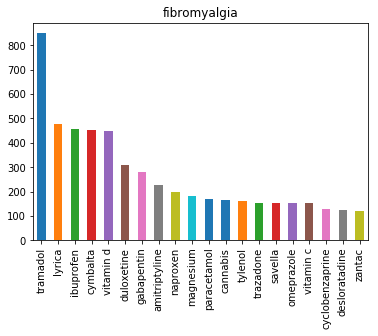

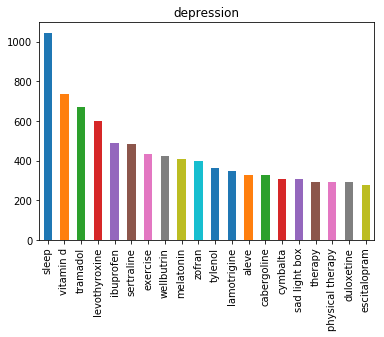

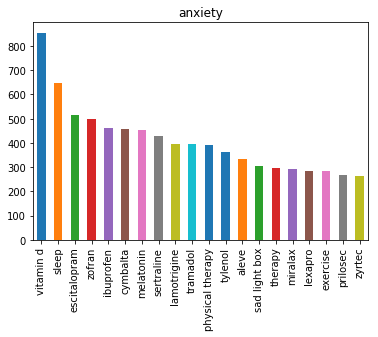

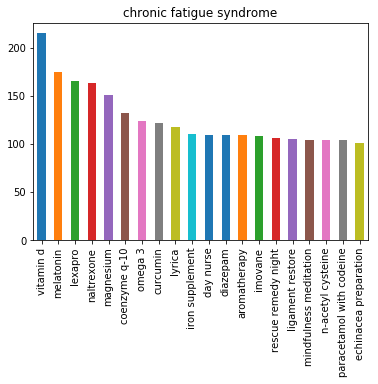

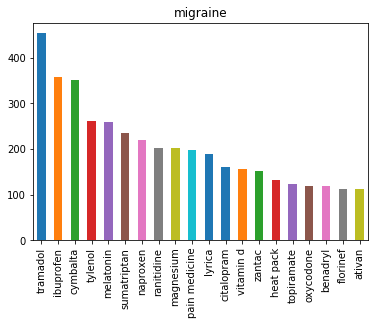

In [10]:
# the top_5_diseases list doesn't include more rigorous regex matching we do later down in the notebook
top_5_diseases = list(df[df['trackable_type'] == 'Condition']['trackable_name'].value_counts().head(5).index)
for i in top_5_diseases:
    distinct_user_check_in = df.groupby(['user_id', 'checkin_date']).filter(lambda x: i in x['trackable_name'].values)
    treatments = distinct_user_check_in[distinct_user_check_in['trackable_type'] == 'Treatment']['trackable_name']
    treatments.value_counts().head(20).plot.bar(title=i)
    plt.show()

This basically shows us how often a treatment is being used for a disease in the entire dataset. However, we count one usage as one user using it a least once on a unique day. This doesn't necessarily measure effectiveness of the treatment, which we will do later in the notebook

### Let's see if there are any trends with patients using Flaredown long term

In [11]:
def duration(x):
    return x.values[len(x)-1] - x.values[0]

# For each user, let's take create a new value called duration -> length of app usage
df_duration = df[df['trackable_type'] == 'Condition']
df_duration['duration'] = df.groupby('user_id')['checkin_date'].transform(duration)
df_duration['duration'] = pd.to_numeric(df_duration['duration'])
df_duration = df_duration.convert_objects(convert_numeric=True)
df_duration = df_duration.sort_values('duration',ascending=False)

# Let's just keep values that are at least 1 year (converted to nanoseconds, default for datetime series)
df_one_year = df_duration[df_duration['duration'] > 31556952000000000]

C:\Users\bchou\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bchou\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bchou\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  

C:\Users\bchou\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

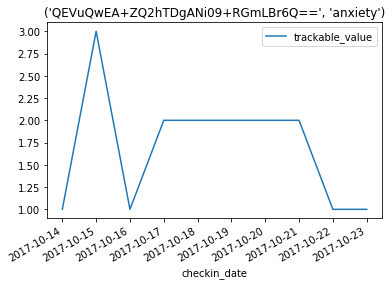

<Figure size 432x288 with 0 Axes>

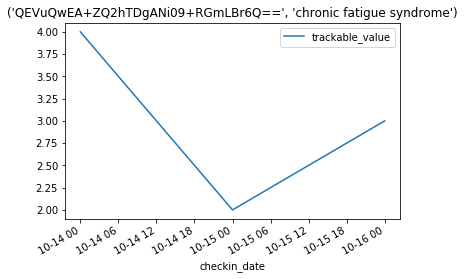

<Figure size 432x288 with 0 Axes>

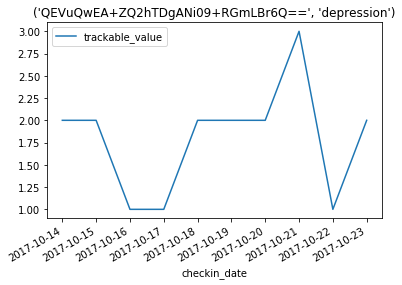

<Figure size 432x288 with 0 Axes>

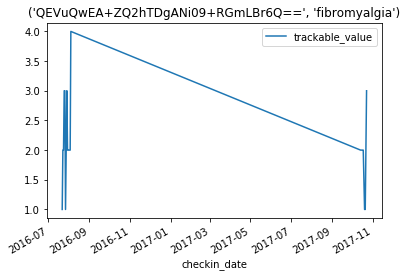

<Figure size 432x288 with 0 Axes>

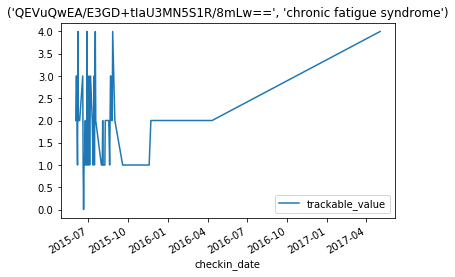

<Figure size 432x288 with 0 Axes>

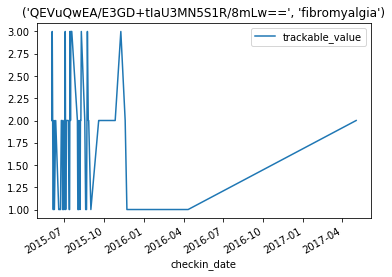

<Figure size 432x288 with 0 Axes>

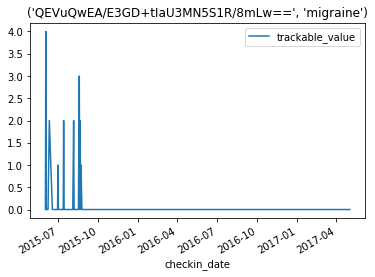

<Figure size 432x288 with 0 Axes>

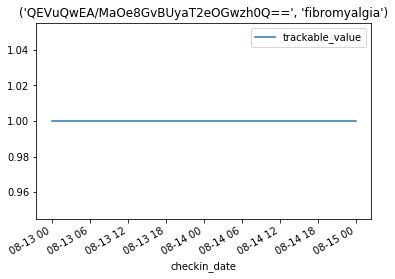

<Figure size 432x288 with 0 Axes>

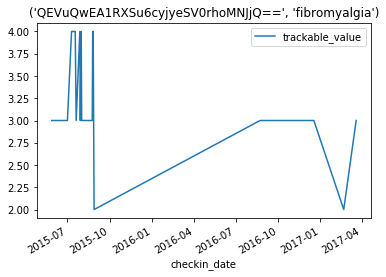

<Figure size 432x288 with 0 Axes>

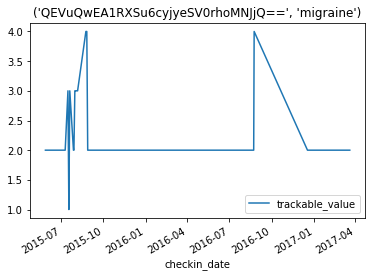

<Figure size 432x288 with 0 Axes>

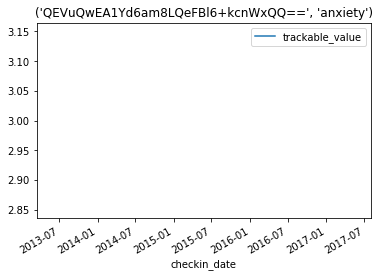

<Figure size 432x288 with 0 Axes>

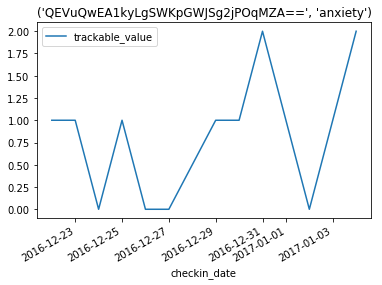

<Figure size 432x288 with 0 Axes>

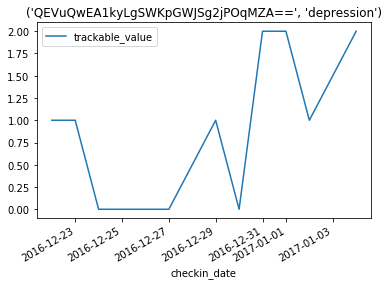

<Figure size 432x288 with 0 Axes>

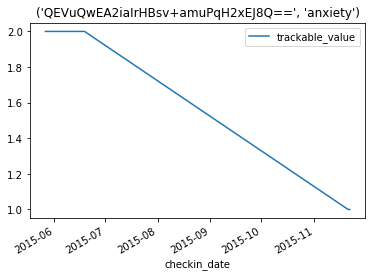

<Figure size 432x288 with 0 Axes>

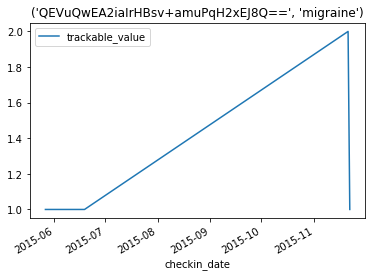

<Figure size 432x288 with 0 Axes>

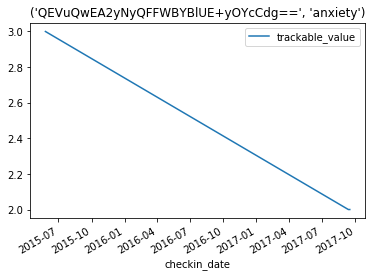

<Figure size 432x288 with 0 Axes>

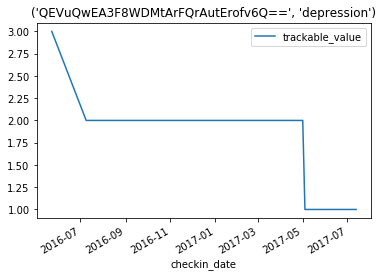

<Figure size 432x288 with 0 Axes>

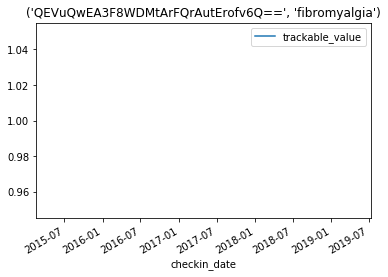

<Figure size 432x288 with 0 Axes>

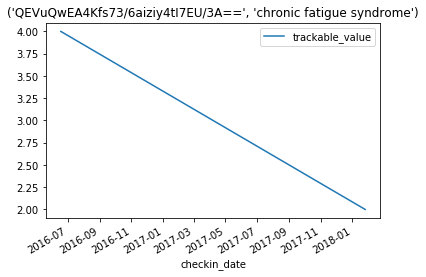

<Figure size 432x288 with 0 Axes>

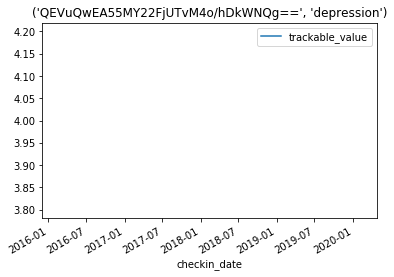

<Figure size 432x288 with 0 Axes>

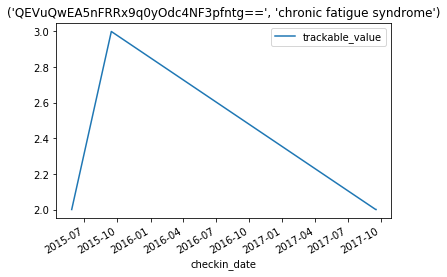

<Figure size 432x288 with 0 Axes>

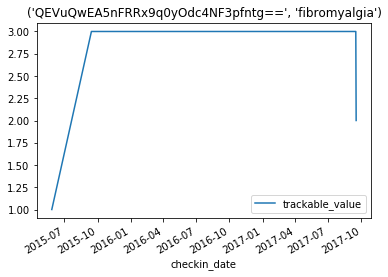

<Figure size 432x288 with 0 Axes>

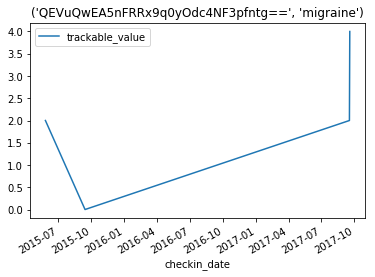

<Figure size 432x288 with 0 Axes>

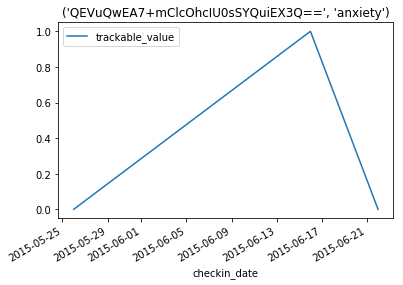

<Figure size 432x288 with 0 Axes>

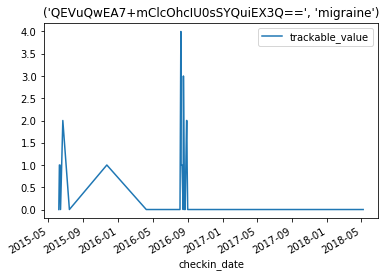

<Figure size 432x288 with 0 Axes>

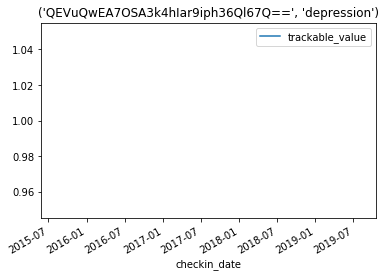

<Figure size 432x288 with 0 Axes>

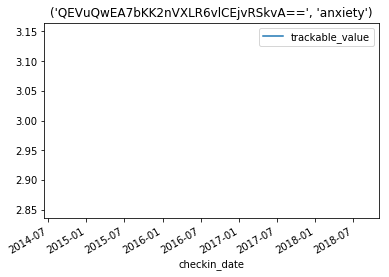

<Figure size 432x288 with 0 Axes>

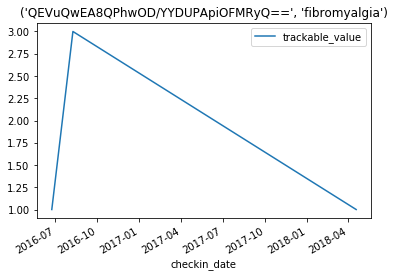

<Figure size 432x288 with 0 Axes>

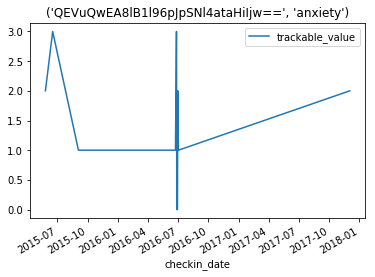

<Figure size 432x288 with 0 Axes>

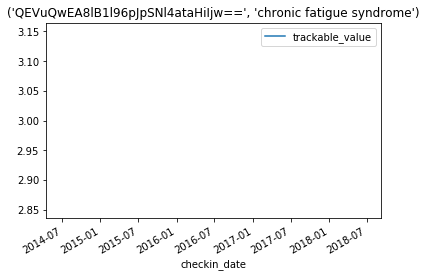

<Figure size 432x288 with 0 Axes>

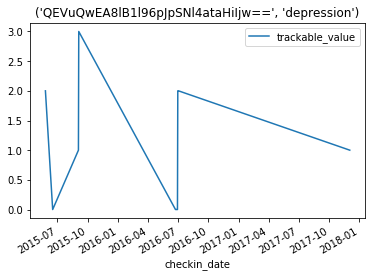

<Figure size 432x288 with 0 Axes>

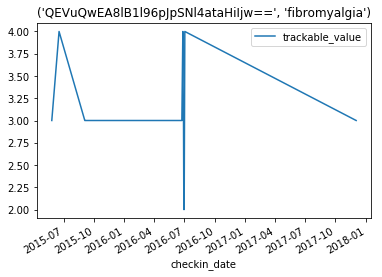

<Figure size 432x288 with 0 Axes>

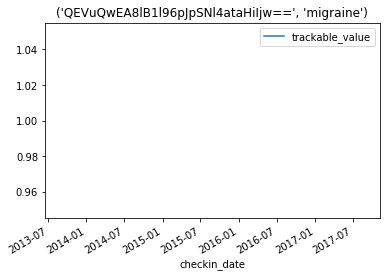

<Figure size 432x288 with 0 Axes>

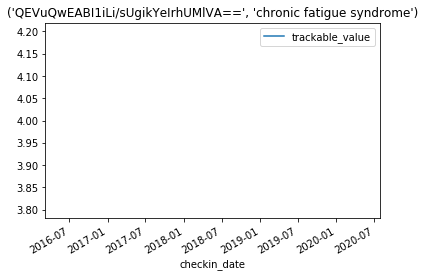

<Figure size 432x288 with 0 Axes>

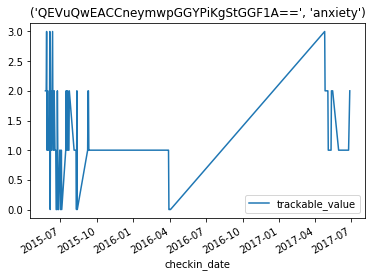

<Figure size 432x288 with 0 Axes>

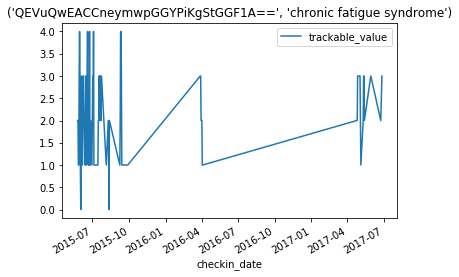

<Figure size 432x288 with 0 Axes>

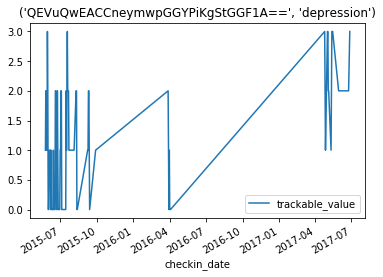

<Figure size 432x288 with 0 Axes>

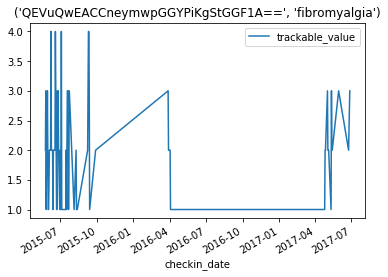

<Figure size 432x288 with 0 Axes>

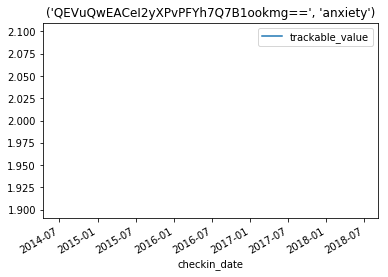

<Figure size 432x288 with 0 Axes>

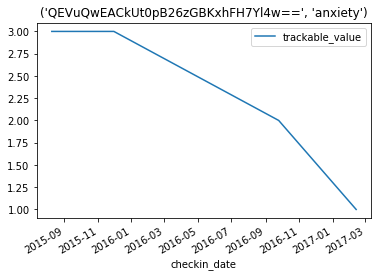

<Figure size 432x288 with 0 Axes>

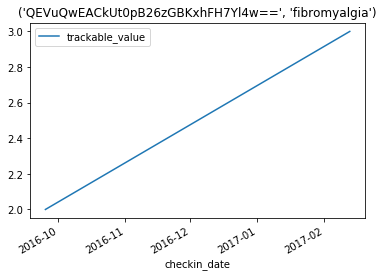

<Figure size 432x288 with 0 Axes>

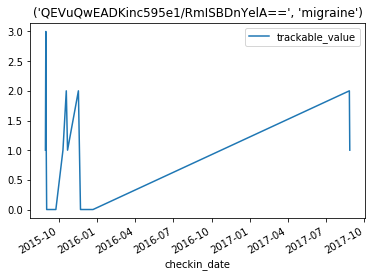

<Figure size 432x288 with 0 Axes>

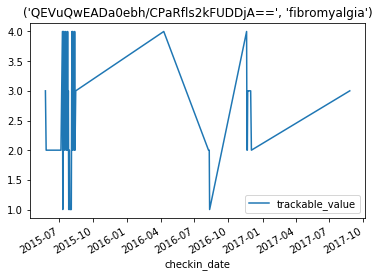

<Figure size 432x288 with 0 Axes>

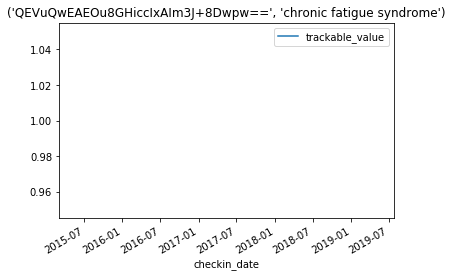

<Figure size 432x288 with 0 Axes>

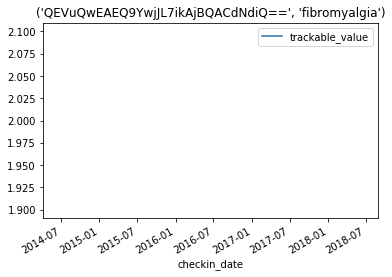

<Figure size 432x288 with 0 Axes>

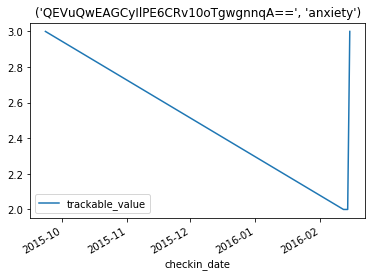

<Figure size 432x288 with 0 Axes>

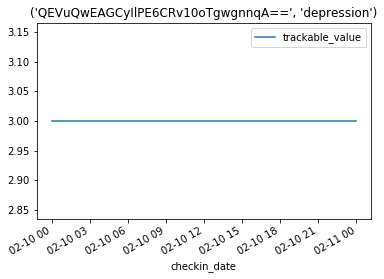

<Figure size 432x288 with 0 Axes>

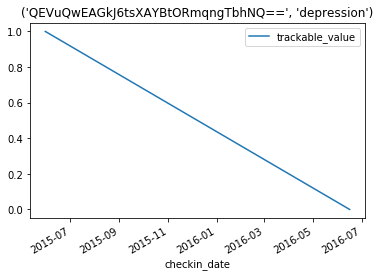

<Figure size 432x288 with 0 Axes>

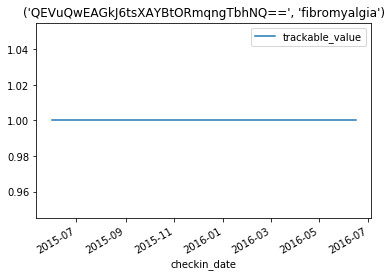

<Figure size 432x288 with 0 Axes>

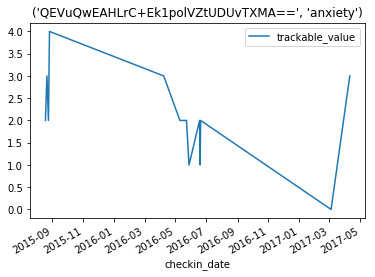

<Figure size 432x288 with 0 Axes>

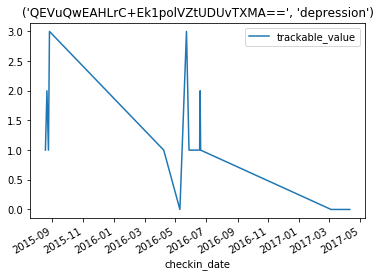

<Figure size 432x288 with 0 Axes>

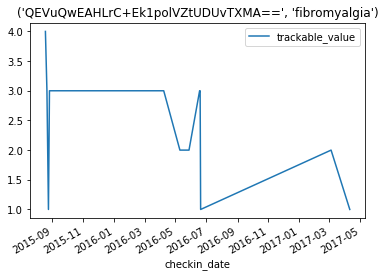

<Figure size 432x288 with 0 Axes>

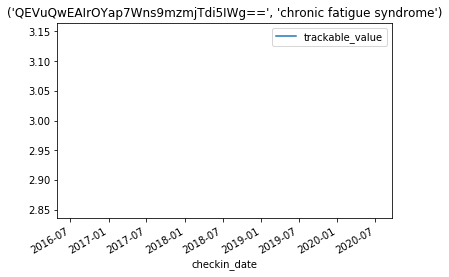

<Figure size 432x288 with 0 Axes>

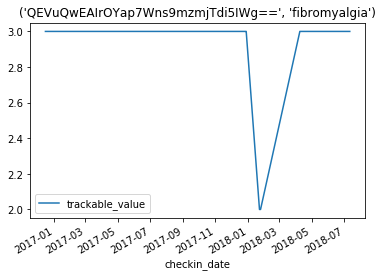

<Figure size 432x288 with 0 Axes>

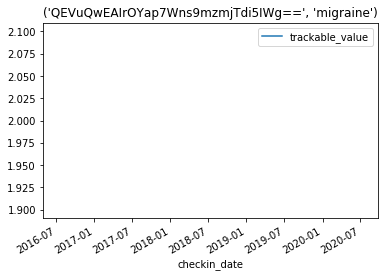

<Figure size 432x288 with 0 Axes>

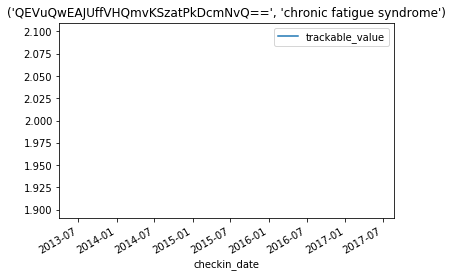

<Figure size 432x288 with 0 Axes>

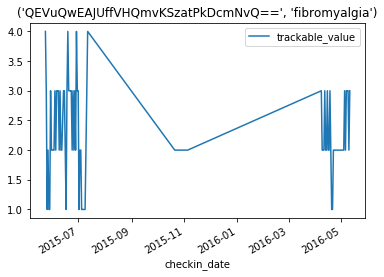

<Figure size 432x288 with 0 Axes>

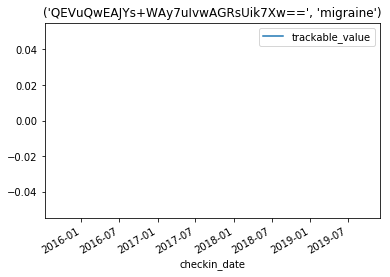

<Figure size 432x288 with 0 Axes>

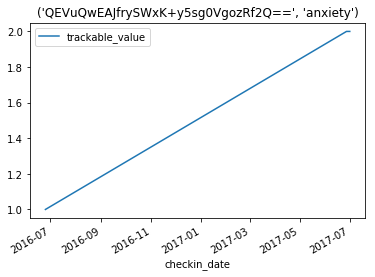

<Figure size 432x288 with 0 Axes>

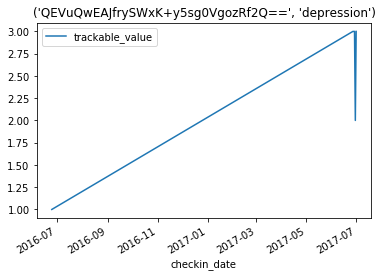

<Figure size 432x288 with 0 Axes>

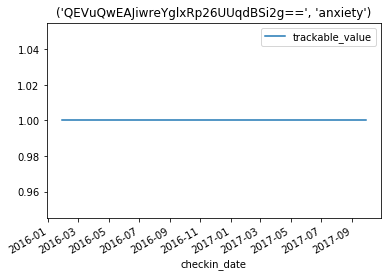

<Figure size 432x288 with 0 Axes>

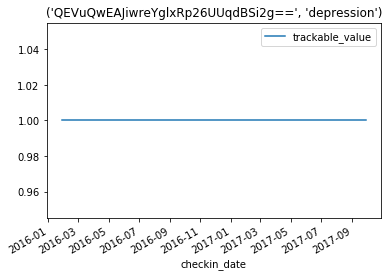

<Figure size 432x288 with 0 Axes>

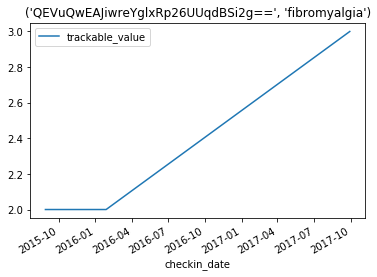

<Figure size 432x288 with 0 Axes>

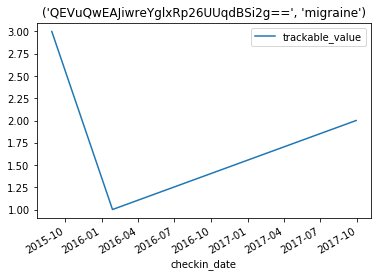

<Figure size 432x288 with 0 Axes>

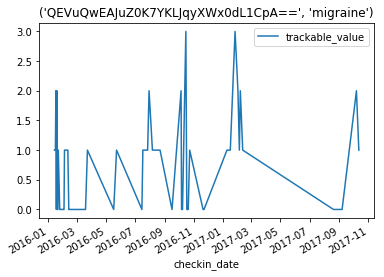

<Figure size 432x288 with 0 Axes>

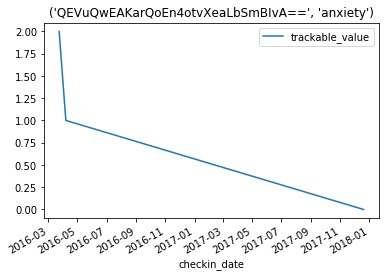

<Figure size 432x288 with 0 Axes>

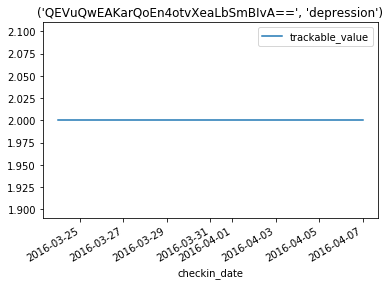

<Figure size 432x288 with 0 Axes>

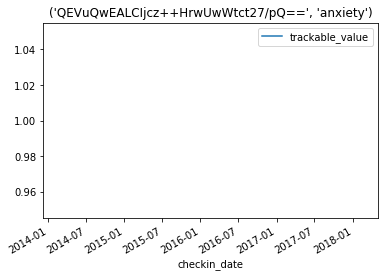

<Figure size 432x288 with 0 Axes>

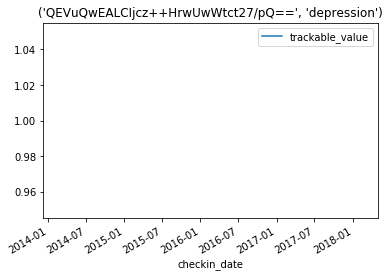

<Figure size 432x288 with 0 Axes>

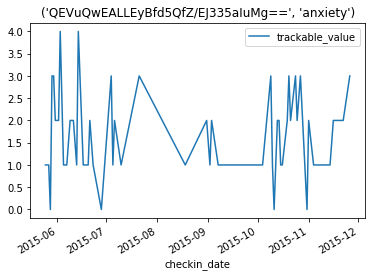

<Figure size 432x288 with 0 Axes>

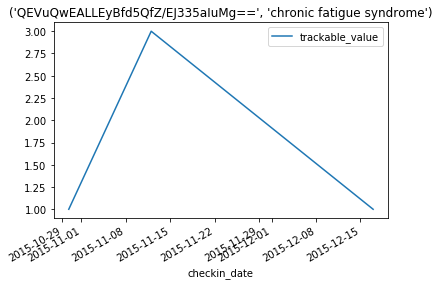

<Figure size 432x288 with 0 Axes>

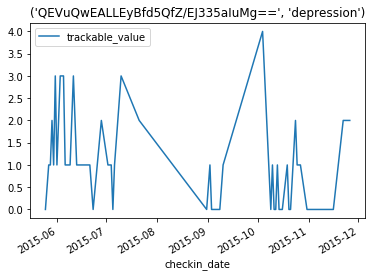

<Figure size 432x288 with 0 Axes>

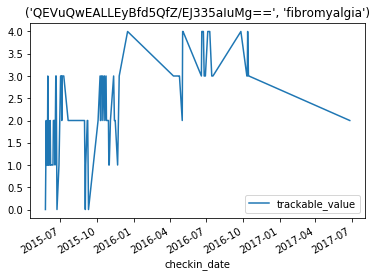

<Figure size 432x288 with 0 Axes>

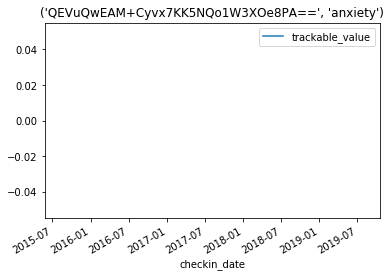

<Figure size 432x288 with 0 Axes>

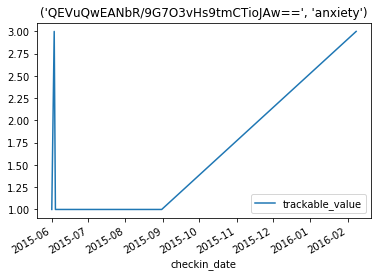

<Figure size 432x288 with 0 Axes>

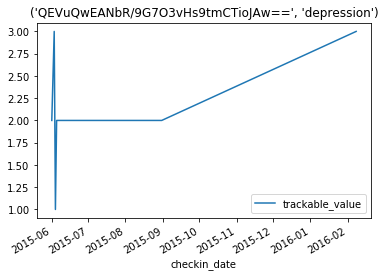

<Figure size 432x288 with 0 Axes>

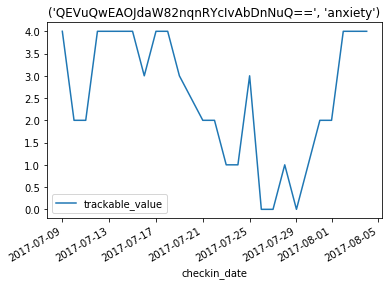

<Figure size 432x288 with 0 Axes>

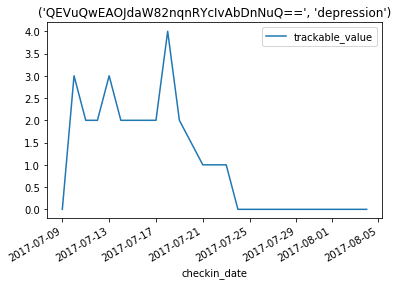

<Figure size 432x288 with 0 Axes>

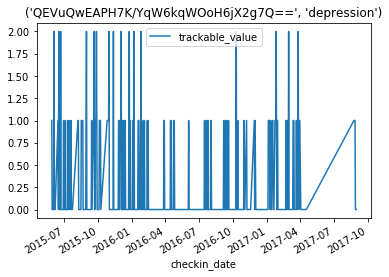

<Figure size 432x288 with 0 Axes>

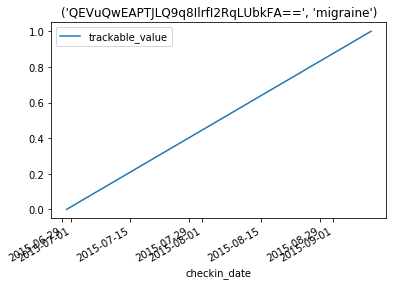

<Figure size 432x288 with 0 Axes>

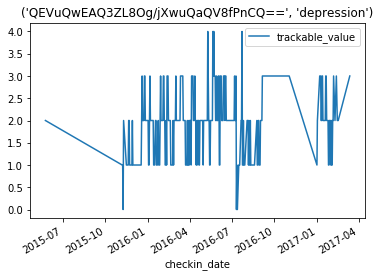

<Figure size 432x288 with 0 Axes>

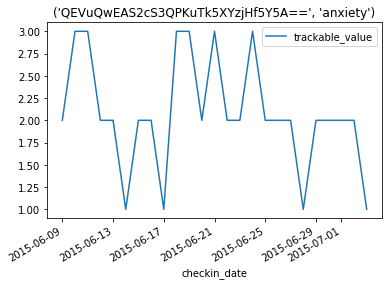

<Figure size 432x288 with 0 Axes>

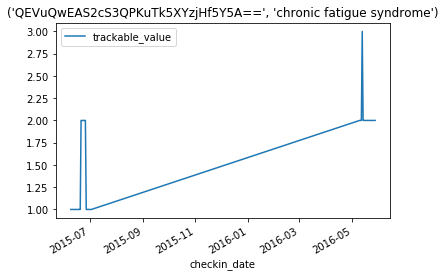

<Figure size 432x288 with 0 Axes>

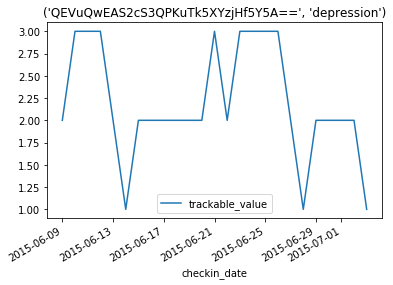

<Figure size 432x288 with 0 Axes>

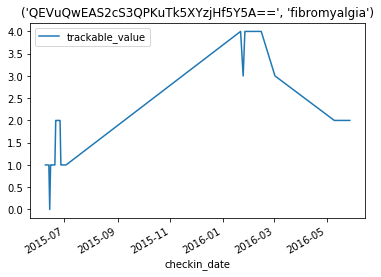

<Figure size 432x288 with 0 Axes>

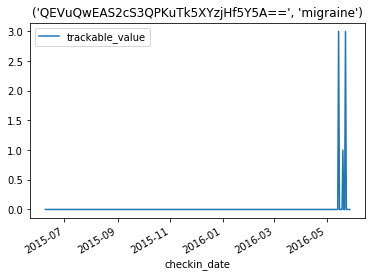

<Figure size 432x288 with 0 Axes>

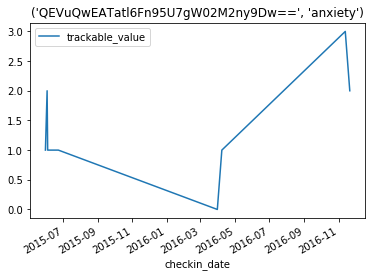

<Figure size 432x288 with 0 Axes>

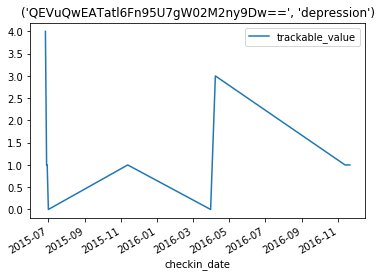

<Figure size 432x288 with 0 Axes>

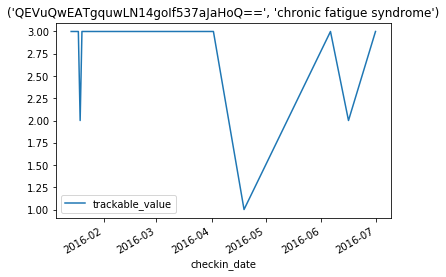

<Figure size 432x288 with 0 Axes>

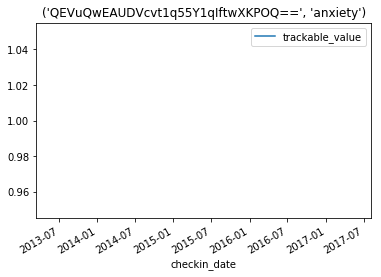

<Figure size 432x288 with 0 Axes>

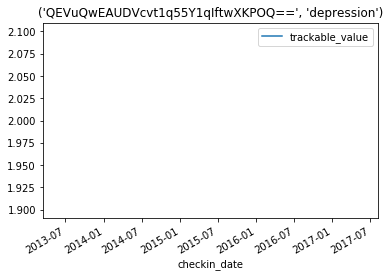

<Figure size 432x288 with 0 Axes>

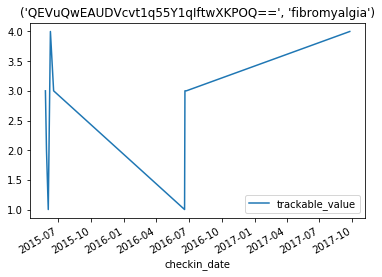

<Figure size 432x288 with 0 Axes>

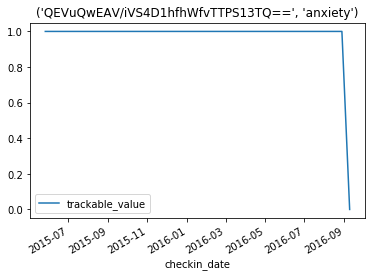

<Figure size 432x288 with 0 Axes>

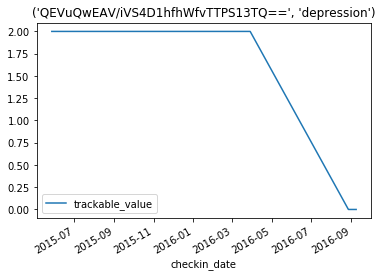

<Figure size 432x288 with 0 Axes>

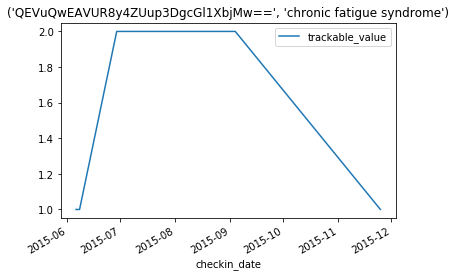

<Figure size 432x288 with 0 Axes>

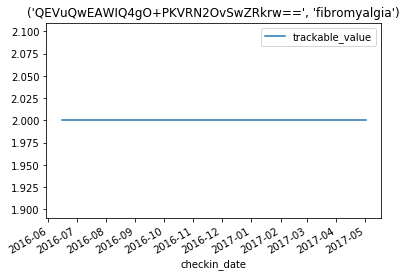

<Figure size 432x288 with 0 Axes>

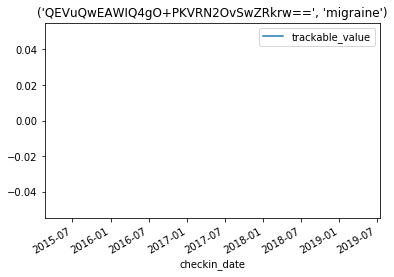

<Figure size 432x288 with 0 Axes>

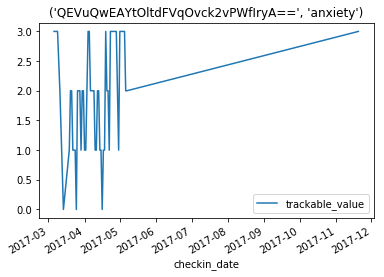

<Figure size 432x288 with 0 Axes>

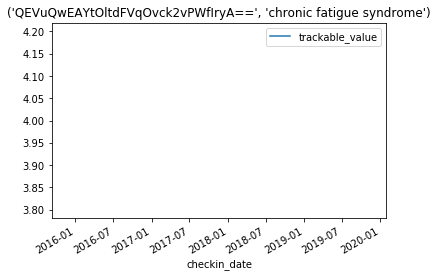

<Figure size 432x288 with 0 Axes>

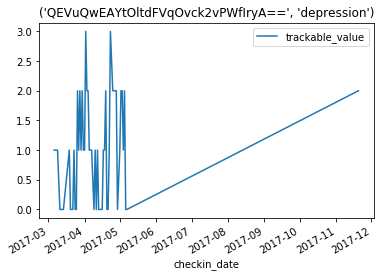

<Figure size 432x288 with 0 Axes>

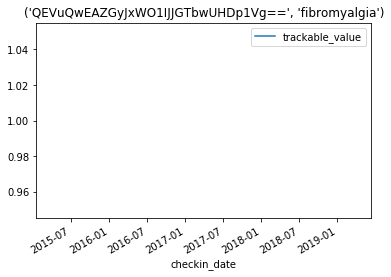

<Figure size 432x288 with 0 Axes>

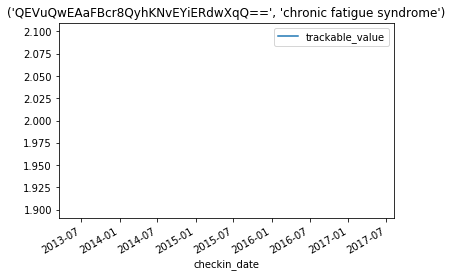

<Figure size 432x288 with 0 Axes>

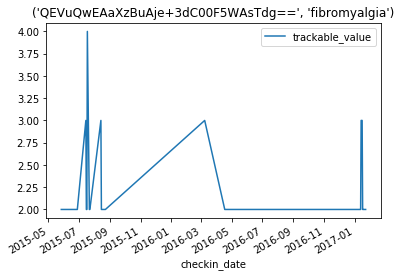

<Figure size 432x288 with 0 Axes>

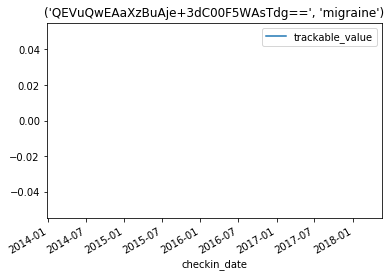

<Figure size 432x288 with 0 Axes>

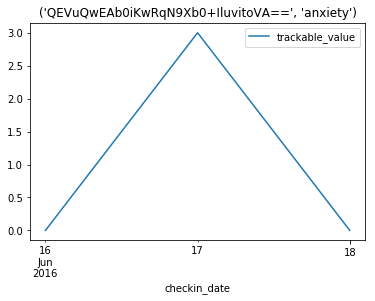

<Figure size 432x288 with 0 Axes>

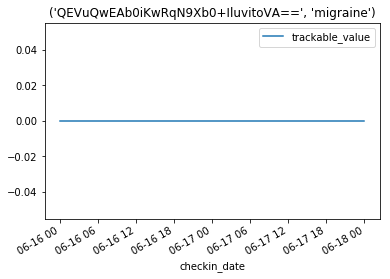

<Figure size 432x288 with 0 Axes>

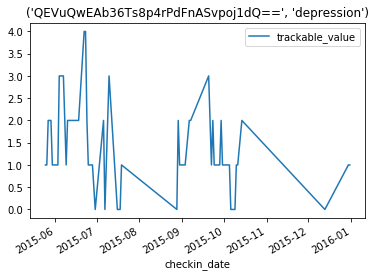

<Figure size 432x288 with 0 Axes>

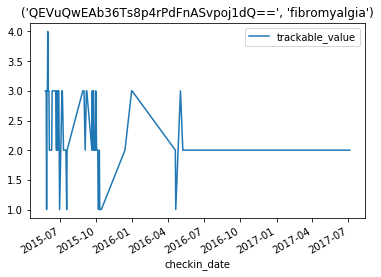

<Figure size 432x288 with 0 Axes>

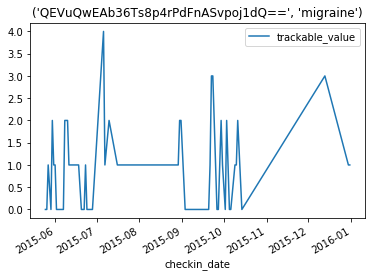

<Figure size 432x288 with 0 Axes>

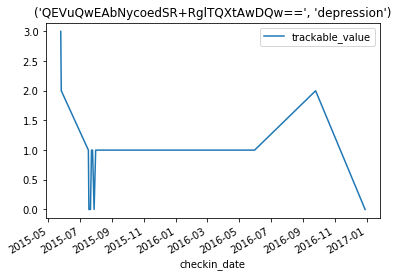

<Figure size 432x288 with 0 Axes>

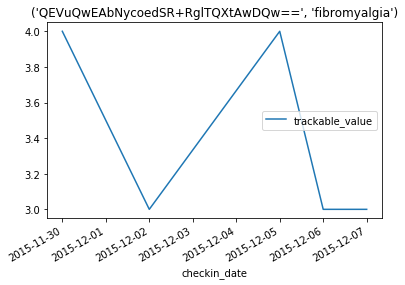

<Figure size 432x288 with 0 Axes>

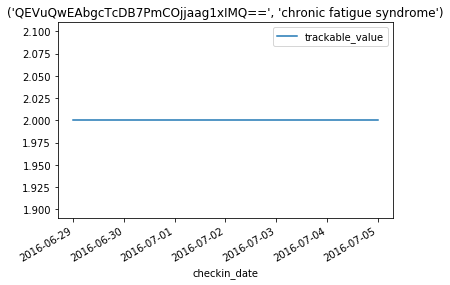

<Figure size 432x288 with 0 Axes>

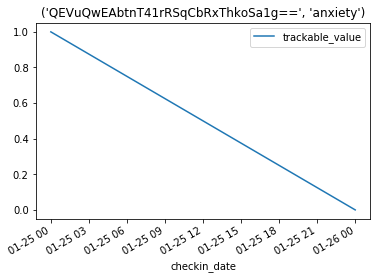

<Figure size 432x288 with 0 Axes>

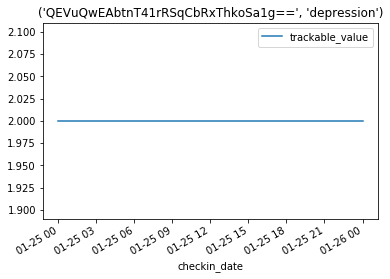

<Figure size 432x288 with 0 Axes>

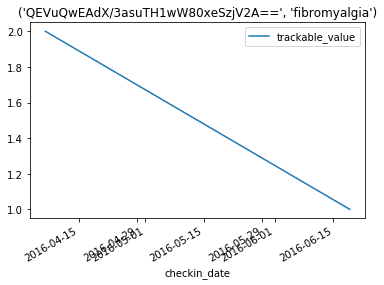

<Figure size 432x288 with 0 Axes>

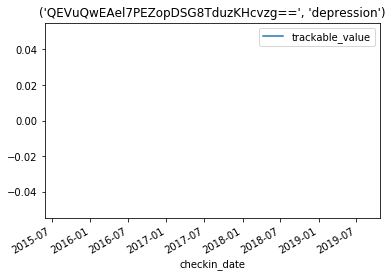

<Figure size 432x288 with 0 Axes>

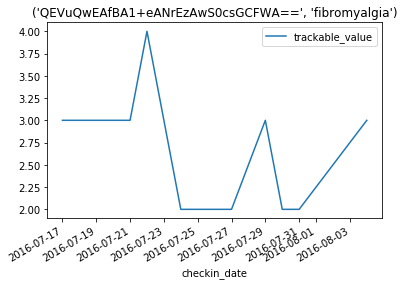

<Figure size 432x288 with 0 Axes>

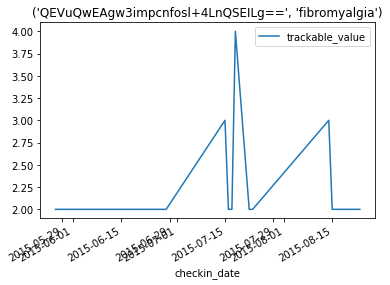

<Figure size 432x288 with 0 Axes>

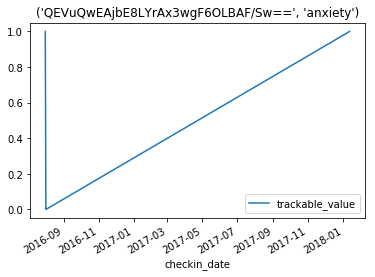

<Figure size 432x288 with 0 Axes>

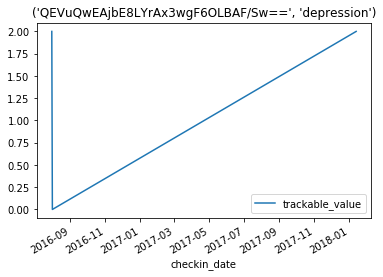

<Figure size 432x288 with 0 Axes>

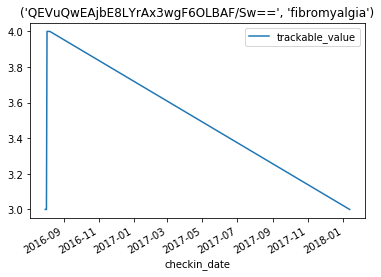

<Figure size 432x288 with 0 Axes>

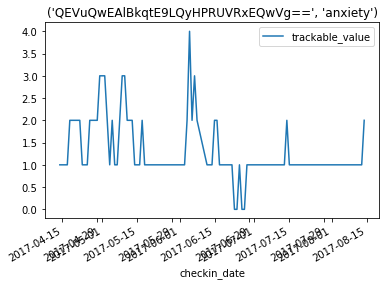

<Figure size 432x288 with 0 Axes>

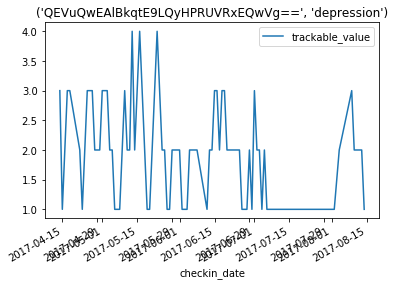

<Figure size 432x288 with 0 Axes>

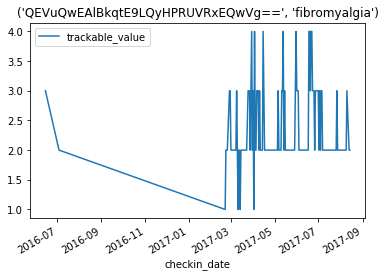

<Figure size 432x288 with 0 Axes>

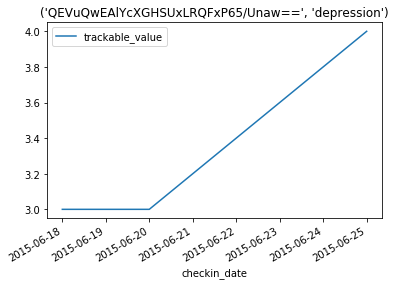

<Figure size 432x288 with 0 Axes>

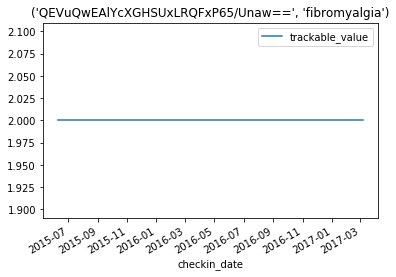

<Figure size 432x288 with 0 Axes>

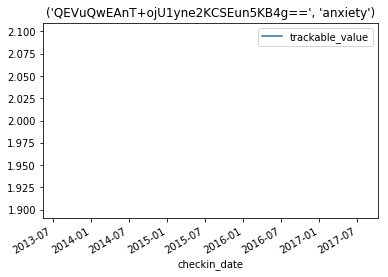

<Figure size 432x288 with 0 Axes>

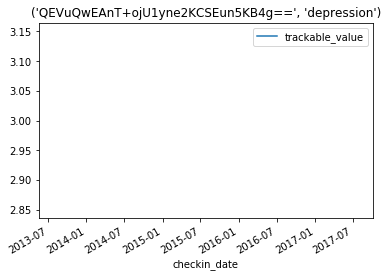

<Figure size 432x288 with 0 Axes>

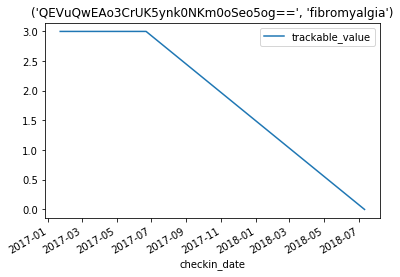

<Figure size 432x288 with 0 Axes>

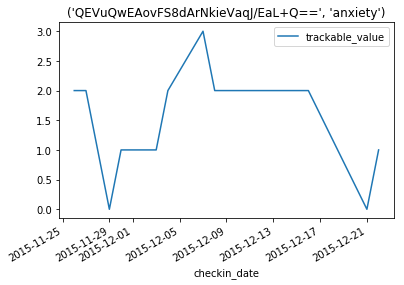

<Figure size 432x288 with 0 Axes>

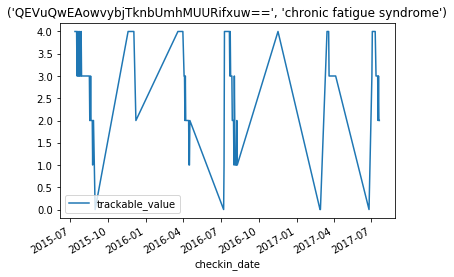

<Figure size 432x288 with 0 Axes>

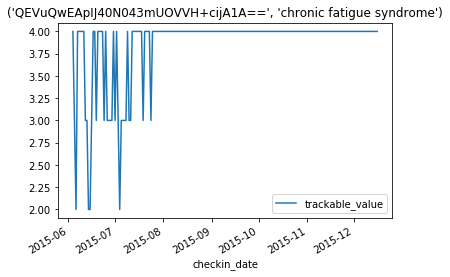

<Figure size 432x288 with 0 Axes>

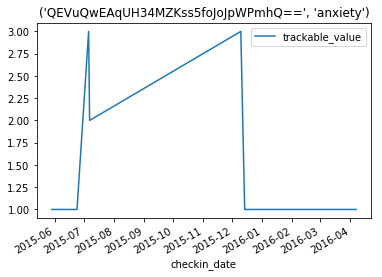

<Figure size 432x288 with 0 Axes>

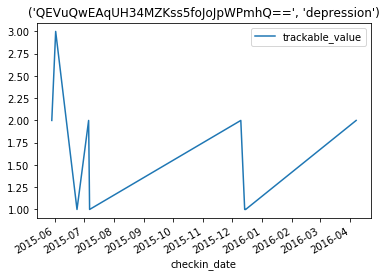

<Figure size 432x288 with 0 Axes>

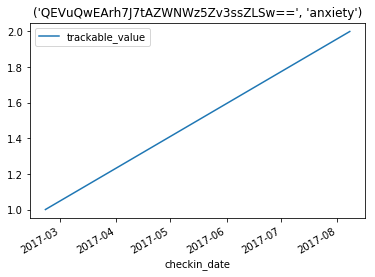

<Figure size 432x288 with 0 Axes>

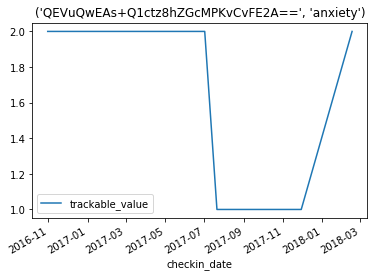

<Figure size 432x288 with 0 Axes>

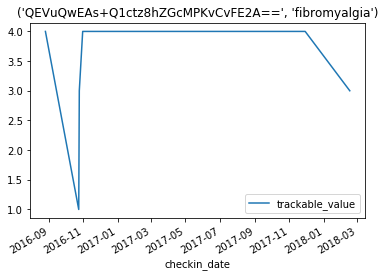

<Figure size 432x288 with 0 Axes>

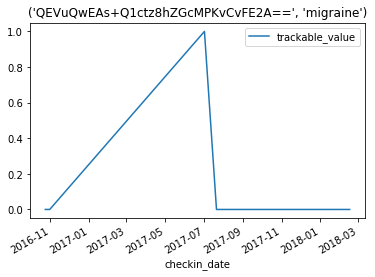

<Figure size 432x288 with 0 Axes>

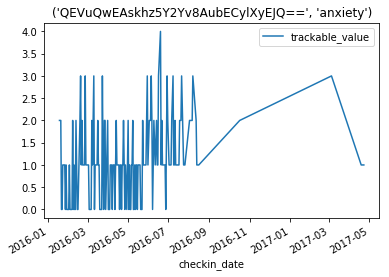

<Figure size 432x288 with 0 Axes>

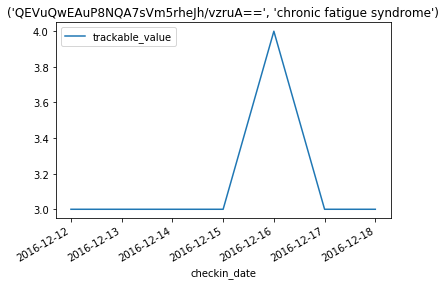

<Figure size 432x288 with 0 Axes>

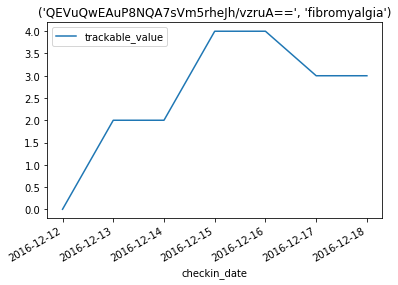

<Figure size 432x288 with 0 Axes>

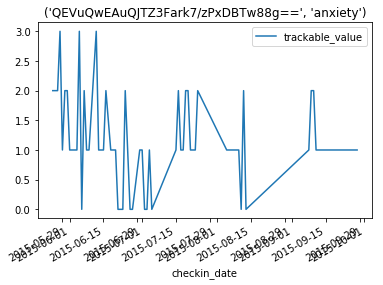

<Figure size 432x288 with 0 Axes>

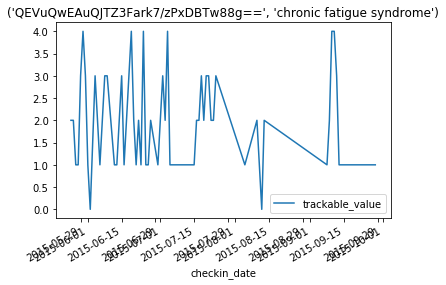

<Figure size 432x288 with 0 Axes>

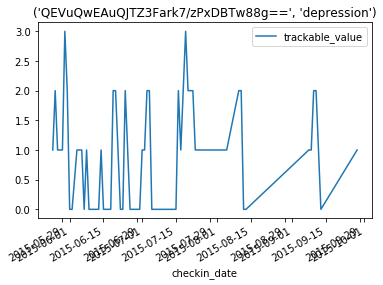

<Figure size 432x288 with 0 Axes>

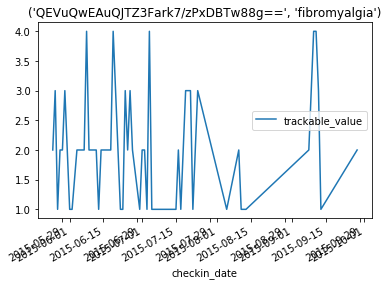

<Figure size 432x288 with 0 Axes>

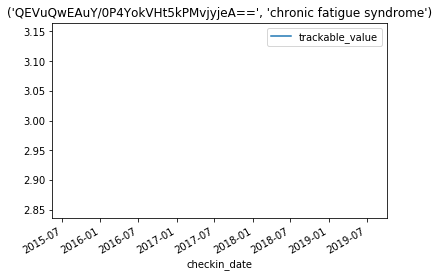

<Figure size 432x288 with 0 Axes>

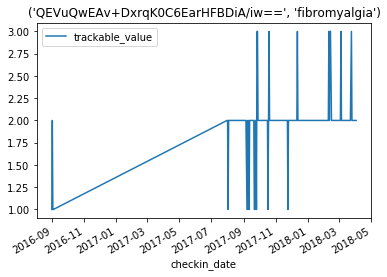

<Figure size 432x288 with 0 Axes>

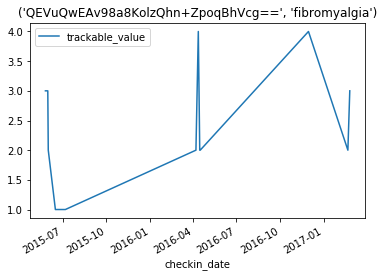

<Figure size 432x288 with 0 Axes>

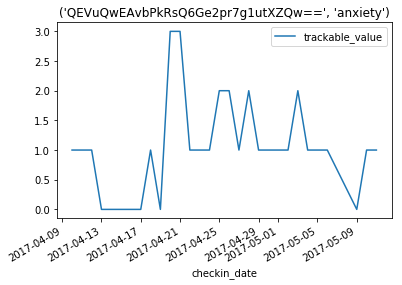

<Figure size 432x288 with 0 Axes>

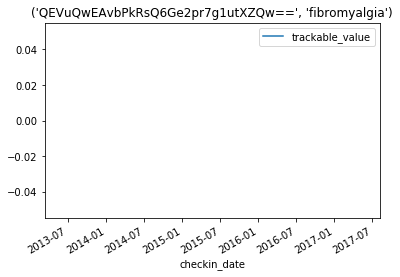

<Figure size 432x288 with 0 Axes>

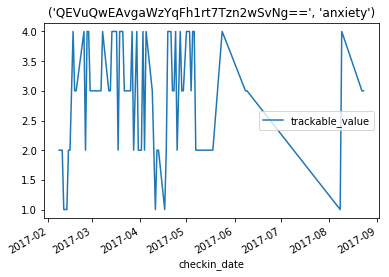

<Figure size 432x288 with 0 Axes>

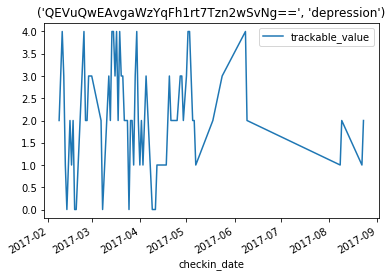

<Figure size 432x288 with 0 Axes>

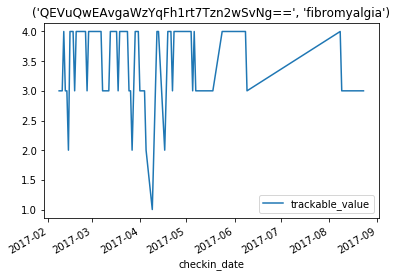

<Figure size 432x288 with 0 Axes>

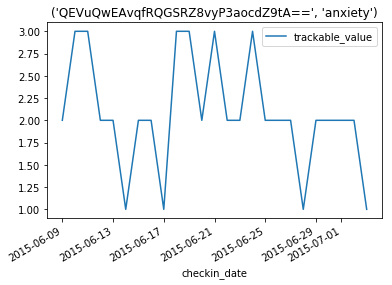

<Figure size 432x288 with 0 Axes>

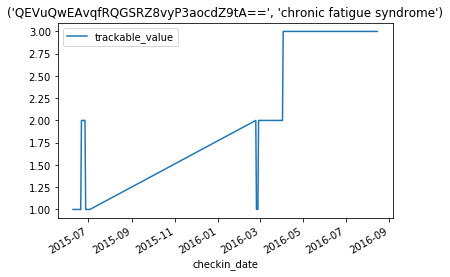

<Figure size 432x288 with 0 Axes>

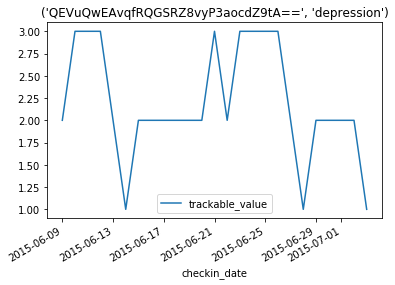

<Figure size 432x288 with 0 Axes>

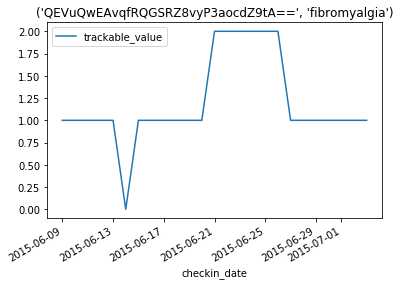

<Figure size 432x288 with 0 Axes>

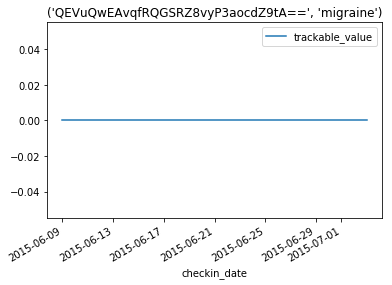

<Figure size 432x288 with 0 Axes>

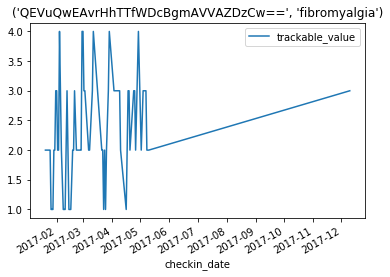

<Figure size 432x288 with 0 Axes>

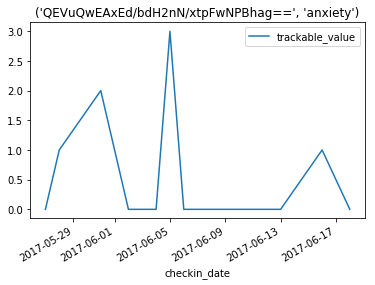

<Figure size 432x288 with 0 Axes>

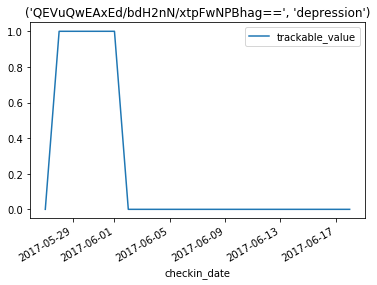

<Figure size 432x288 with 0 Axes>

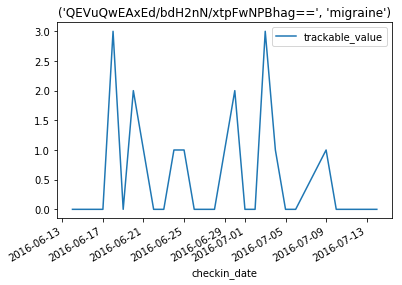

<Figure size 432x288 with 0 Axes>

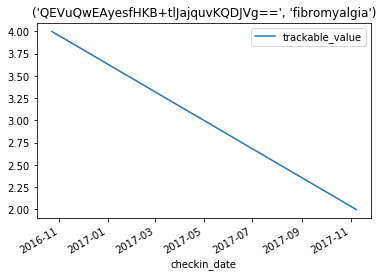

<Figure size 432x288 with 0 Axes>

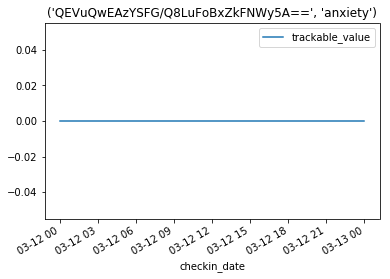

<Figure size 432x288 with 0 Axes>

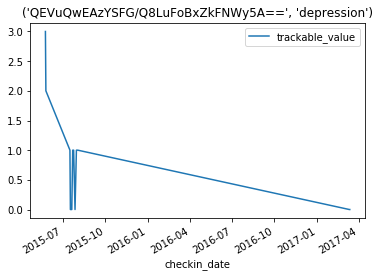

<Figure size 432x288 with 0 Axes>

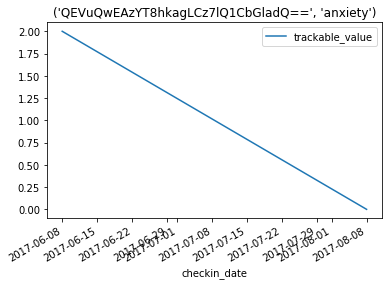

<Figure size 432x288 with 0 Axes>

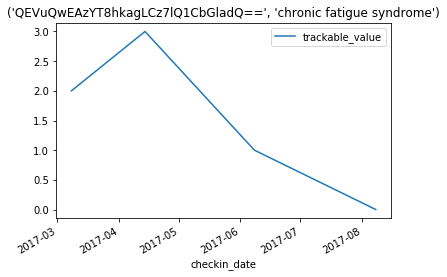

In [12]:
# keep scale to 4, whole scale

for i, group in df_one_year.groupby(['user_id','trackable_name']):
    if i[1] in top_5_diseases:
        plt.figure()
        group.plot(x='checkin_date', y='trackable_value', title=str(i))

### Let's look at specific autoimmune diseases

In [13]:
dfMS=df[df["trackable_name"].str.contains('^ms$|multiple sclerosis',regex=True)]
print("Users experiencing MS: "+ str(len(dfMS.groupby('user_id'))))
# ^ not necessarily the number of data points, but rather the number of unique users experiencing this disease
# if we want to look at datapoints, just print without user id
print("# of datapoints for MS: "+ str(len(dfMS)))
print(set(dfMS["trackable_name"]))

Users experiencing MS: 157
# of datapoints for MS: 542
{'multiple sclerosis', 'ms'}


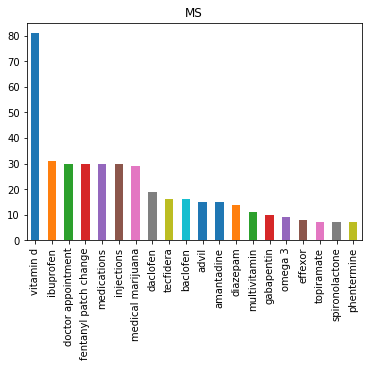

In [14]:
distinct_user_check_in = df.groupby(['user_id', 'checkin_date']).filter(lambda x: x['trackable_name'].str.contains('^ms$|multiple sclerosis').any())
treatments = distinct_user_check_in[distinct_user_check_in['trackable_type'] == 'Treatment']['trackable_name']
treatments.value_counts().head(20).plot.bar(title="MS")
plt.show()

In [15]:
dfRA=df[df["trackable_name"].str.contains('^ra$|rheumatoid arthritis', regex=True)]
print("Users experiencing RA: "+ str(len(dfRA.groupby('user_id'))))
print("# of datapoints for RA: "+ str(len(dfRA)))
print(set(dfRA["trackable_name"]))

Users experiencing RA: 353
# of datapoints for RA: 1331
{'juvenile rheumatoid arthritis', 'rheumatoid arthritis'}


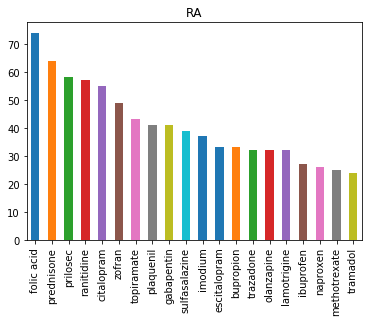

In [16]:
distinct_user_check_in = df.groupby(['user_id', 'checkin_date']).filter(lambda x: x['trackable_name'].str.contains('^ra$|rheumatoid arthritis',regex=True).any())
treatments = distinct_user_check_in[distinct_user_check_in['trackable_type'] == 'Treatment']['trackable_name']
treatments.value_counts().head(20).plot.bar(title="RA")
plt.show()

In [17]:
dfPso=df[df["trackable_name"].str.contains('psoriasis', regex=True)]
print("Users experiencing Psoriasis: "+ str(len(dfPso.groupby('user_id'))))
print("# of datapoints for Psoriasis: "+ str(len(dfPso)))
print(set(dfPso["trackable_name"]))

Users experiencing Psoriasis: 157
# of datapoints for Psoriasis: 1116
{'psoriasis', 'guttate psoriasis', 'rash psoriasis'}


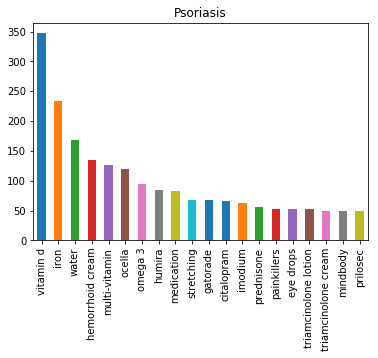

In [18]:
distinct_user_check_in = df.groupby(['user_id', 'checkin_date']).filter(lambda x: x['trackable_name'].str.contains('psoriasis',regex=True).any())
treatments = distinct_user_check_in[distinct_user_check_in['trackable_type'] == 'Treatment']['trackable_name']
treatments.value_counts().head(20).plot.bar(title="Psoriasis")
plt.show()

In [19]:
dfLup=df[df["trackable_name"].str.contains('lupus|^sle$', regex=True)]
print("Users experiencing Lupus: "+ str(len(dfLup.groupby('user_id'))))
print("# of datapoints for Lupus: "+ str(len(dfLup)))
print(set(dfLup["trackable_name"]))

Users experiencing Lupus: 437
# of datapoints for Lupus: 1517
{'systemic lupus erythematosus', 'sytemic lupus erythematosus', 'lupus butterfly rash', 'lupus', 'sub acute cutaneous lupus erythmatosis', 'discoid lupus', 'sle', 'lupus nephritis', 'lupus fog', 'systematic lupus', 'lupus rash'}


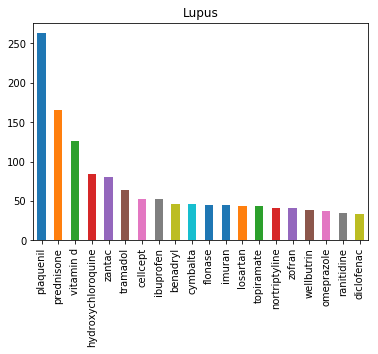

In [20]:
distinct_user_check_in = df.groupby(['user_id', 'checkin_date']).filter(lambda x: x['trackable_name'].str.contains('lupus|^sle$',regex=True).any())
treatments = distinct_user_check_in[distinct_user_check_in['trackable_type'] == 'Treatment']['trackable_name']
treatments.value_counts().head(20).plot.bar(title="Lupus")
plt.show()

In [21]:
# added a space after crest so we wouldn't get matches like crestor, which is totally different
dfScle=df[df["trackable_name"].str.contains('scleroderma|crest ', regex=True)]
print("Users experiencing Scleroderma: "+ str(len(dfScle.groupby('user_id'))))
print("# of datapoints for Scleroderma: "+ str(len(dfScle)))
print(set(dfScle["trackable_name"]))

Users experiencing Scleroderma: 21
# of datapoints for Scleroderma: 310
{'limited scleroderma (crest syndrome)', 'scleroderma', 'systemic scleroderma', 'crest syndrome'}


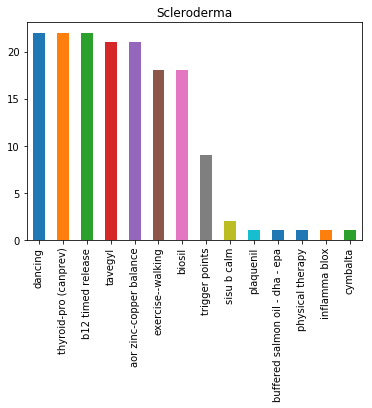

In [22]:
distinct_user_check_in = df.groupby(['user_id', 'checkin_date']).filter(lambda x: x['trackable_name'].str.contains('scleroderma|crest ',regex=True).any())
treatments = distinct_user_check_in[distinct_user_check_in['trackable_type'] == 'Treatment']['trackable_name']
treatments.value_counts().head(20).plot.bar(title="Scleroderma")
plt.show()

In [23]:
dfCrohn=df[df["trackable_name"].str.contains('crohn|ileitis', regex=True)]
print("Users experiencing Crohn's disease: "+ str(len(dfCrohn.groupby('user_id'))))
print("# of datapoints for Crohn's disease: "+ str(len(dfCrohn)))
print(set(dfCrohn["trackable_name"]))

Users experiencing Crohn's disease: 399
# of datapoints for Crohn's disease: 1482
{'crohns', 'crohn', 'spondylitis , crohns disease,copd', "crohn's disease", 'crohns disease', 'crohn’s disease'}


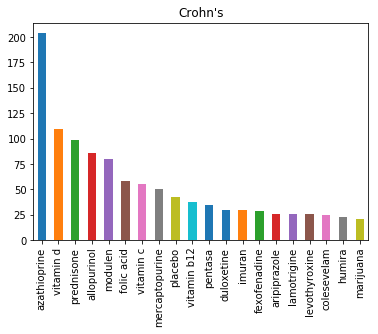

In [24]:
distinct_user_check_in = df.groupby(['user_id', 'checkin_date']).filter(lambda x: x['trackable_name'].str.contains('crohn|ileitis',regex=True).any())
treatments = distinct_user_check_in[distinct_user_check_in['trackable_type'] == 'Treatment']['trackable_name']
treatments.value_counts().head(20).plot.bar(title="Crohn's")
plt.show()

In [25]:
dfColitis=df[df["trackable_name"].str.contains('colitis', regex=True)]
print("Users experiencing Colitis disease: "+ str(len(dfColitis.groupby('user_id'))))
print("# of datapoints for Colitis disease: "+ str(len(dfColitis)))
print(set(dfColitis["trackable_name"]))

Users experiencing Colitis disease: 280
# of datapoints for Colitis disease: 1566
{'necrotizing enterocolitis ', 'indeterminate colitis', 'ulcerated colitis', 'ulcerative colitis', 'colitis', 'lymphocytic colitis', 'collagenous colitis', 'eosinophilic colitis', 'microscopic colitis'}


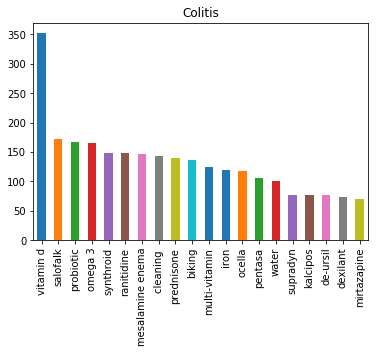

In [26]:
distinct_user_check_in = df.groupby(['user_id', 'checkin_date']).filter(lambda x: x['trackable_name'].str.contains('colitis', regex=True).any())
treatments = distinct_user_check_in[distinct_user_check_in['trackable_type'] == 'Treatment']['trackable_name']
treatments.value_counts().head(20).plot.bar(title="Colitis")
plt.show()

In [27]:
dfIBD=df[df["trackable_name"].str.contains('inflammatory bowel disease|^ibd$', regex=True)]
print("Users experiencing IBD: "+ str(len(dfIBD.groupby('user_id'))))
print("# of datapoints for IBD: "+ str(len(dfIBD)))
print(set(dfIBD["trackable_name"]))

Users experiencing IBD: 42
# of datapoints for IBD: 132
{'inflammatory bowel disease (ibd)', 'ibd'}


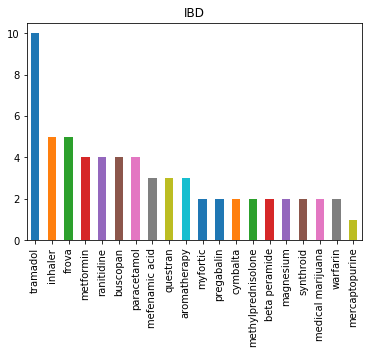

In [28]:
distinct_user_check_in = df.groupby(['user_id', 'checkin_date']).filter(lambda x: x['trackable_name'].str.contains('inflammatory bowel disease|^ibd$', regex=True).any())
treatments = distinct_user_check_in[distinct_user_check_in['trackable_type'] == 'Treatment']['trackable_name']
treatments.value_counts().head(20).plot.bar(title="IBD")
plt.show()

### Now let's look at the effectiveness of treatments for these select diseases
we will look at the treatment_value before and after the day a treatment is used.  

In [32]:
treatments = df[df['trackable_type'] == "Treatment"]
treatment_start_dates = treatments.groupby(['user_id', 'trackable_name'])['checkin_date'].min().reset_index()
treatment_end_dates = treatments.groupby(['user_id', 'trackable_name'])['checkin_date'].max().reset_index()
# Merging the first and laste dates of treatment
treatment_dates = treatment_start_dates.merge(treatment_end_dates, on=['user_id','trackable_name'])

# only want symptom and condition
conditions = df[(df['trackable_type'] == "Condition") | (df['trackable_type'] == "Symptom")]
conditions_start_end = conditions.groupby(['user_id', 'trackable_name'])['checkin_date'].min().reset_index()
# merge to get start and end date for these conditions and symptoms
conditions_start_end = conditions_start_end.merge(conditions.groupby(['user_id', 'trackable_name'])['checkin_date'].max().reset_index(), on=['user_id','trackable_name'])

In [34]:
conditions_start_end.head()

user_id           trackable_name checkin_date_x  \
0  QEVuQwEA+/tEquKas1s6wFVgiluL5A==                  anxiety     2017-02-16   
1  QEVuQwEA+/tEquKas1s6wFVgiluL5A==                 diabetes     2017-02-15   
2  QEVuQwEA+/tEquKas1s6wFVgiluL5A==  hashimoto's thyroiditis     2017-02-15   
3  QEVuQwEA+/tEquKas1s6wFVgiluL5A==                 headache     2017-02-15   
4  QEVuQwEA+/tEquKas1s6wFVgiluL5A==                 migraine     2017-02-15   

  checkin_date_y  
0     2017-02-16  
1     2017-02-16  
2     2017-02-16  
3     2017-02-16  
4     2017-02-16

In [35]:
#remove entries that have a week separation
conditions_start_end = conditions_start_end[(conditions_start_end['checkin_date_y'] - conditions_start_end['checkin_date_x']).astype('timedelta64[D]') > 7]

#merge the two dfs together
dates_df = conditions_start_end.merge(treatment_dates, on='user_id')

#changing column names because they are confusing post merge
dates_df.columns = ['user_id','symptom_name','symptom_start','symptom_end', 'treatment_name','treatment_start', 'treatment_end']

#don't want symptoms that started when treatment started, set to 3 days
dates_df = dates_df[(dates_df['treatment_start'] - dates_df['symptom_start']).astype('timedelta64[D]') > 3 ]
#don't want symptoms that stopped before our treatment even started, set to 3 days
dates_df = dates_df[(dates_df['symptom_end'] - dates_df['treatment_start']).astype('timedelta64[D]') > 3 ]

In [37]:
dates_df.head()

user_id      symptom_name symptom_start  \
4   QEVuQwEA+4IOLK/UvNQ/uNqnkttfpQ==    abdominal pain    2016-11-04   
6   QEVuQwEA+4IOLK/UvNQ/uNqnkttfpQ==         back pain    2016-11-04   
8   QEVuQwEA+4IOLK/UvNQ/uNqnkttfpQ==  feeling hopeless    2016-11-04   
9   QEVuQwEA+4IOLK/UvNQ/uNqnkttfpQ==        groin pain    2016-11-04   
10  QEVuQwEA+4IOLK/UvNQ/uNqnkttfpQ==     left hip pain    2016-11-04   

   symptom_end treatment_name treatment_start treatment_end  
4   2016-12-08       neurofen      2016-11-14    2016-12-29  
6   2016-12-08       neurofen      2016-11-14    2016-12-29  
8   2016-12-08       neurofen      2016-11-14    2016-12-29  
9   2016-12-08       neurofen      2016-11-14    2016-12-29  
10  2016-12-08       neurofen      2016-11-14    2016-12-29

In [40]:
#iterate through and find the trackable_values before and after the treatment date
def findBeforeAndAfterTreatment(dates_df_local, orig_df):
    new_df = pd.DataFrame(columns=['user_id', 'age', 'sex', 'country', 'condition','treatment','before_value','after_value','effectiveness'])
    for row in dates_df_local.iterrows():
        row = row[1]
        df_user_symptom = orig_df[(orig_df['user_id'] == row['user_id']) & (orig_df['trackable_name'] == row['symptom_name'])]
        values_before = df_user_symptom[(df_user_symptom['checkin_date'] < row['treatment_start'])]['trackable_value'].values
        values_after = df_user_symptom[(df_user_symptom['checkin_date'] >= row['treatment_start']) & (df_user_symptom['checkin_date'] <= row['treatment_end'])]['trackable_value'].values
        values_before = [x for x in values_before if str(x) != 'nan']
        values_after = [x for x in values_after if str(x) != 'nan']
        values_before = [int(x) for x in values_before]
        values_after =[int(x) for x in values_before]
        mean_before = np.mean(values_before)
        mean_after = np.mean(values_after)
        new_df = new_df.append({'user_id' : row['user_id'], 'age' : orig_df[orig_df['user_id'] == row['user_id']]['age'].values[0], 'sex' : orig_df[orig_df['user_id'] == row['user_id']]['sex'].values[0], 'country' : orig_df[orig_df['user_id'] == row['user_id']]['country'].values[0], 'condition' : row['symptom_name'], 'treatment' : row['treatment_name'], 'before_value' : mean_before, 'after_value' : mean_after, 'effectiveness' : mean_before - mean_after}, ignore_index=True)
    return new_df

In [41]:
treatments_only = findBeforeAndAfterTreatment(dates_df, df)
print(treatments_only.head(10))
print("users that started taking a treatment after logging conditions " + str(len(treatments_only)))
print("users that report lower condition ratings while on a treatment " + str(len(treatments_only[treatments_only['effectiveness'] > 0])))


                            user_id  age         sex country  \
0  QEVuQwEA+4IOLK/UvNQ/uNqnkttfpQ==  1.0  doesnt_say      AU   
1  QEVuQwEA+4IOLK/UvNQ/uNqnkttfpQ==  1.0  doesnt_say      AU   
2  QEVuQwEA+4IOLK/UvNQ/uNqnkttfpQ==  1.0  doesnt_say      AU   
3  QEVuQwEA+4IOLK/UvNQ/uNqnkttfpQ==  1.0  doesnt_say      AU   
4  QEVuQwEA+4IOLK/UvNQ/uNqnkttfpQ==  1.0  doesnt_say      AU   
5  QEVuQwEA+4IOLK/UvNQ/uNqnkttfpQ==  1.0  doesnt_say      AU   
6  QEVuQwEA+4IOLK/UvNQ/uNqnkttfpQ==  1.0  doesnt_say      AU   
7  QEVuQwEA+4IOLK/UvNQ/uNqnkttfpQ==  1.0  doesnt_say      AU   
8  QEVuQwEA+4IOLK/UvNQ/uNqnkttfpQ==  1.0  doesnt_say      AU   
9  QEVuQwEA+4IOLK/UvNQ/uNqnkttfpQ==  1.0  doesnt_say      AU   

          condition treatment  before_value  after_value  effectiveness  
0    abdominal pain  neurofen           0.2          0.2            0.0  
1         back pain  neurofen           2.6          2.6            0.0  
2  feeling hopeless  neurofen           0.2          0.2            0.0  